In [1]:
import ugradio
import numpy as np
import matplotlib.pylab as plt
import inspect
import collections

In [2]:
pwd = '/home/zoeko/astro121lab/lab1/data_sec7/'

In [3]:
def freq_to_period(freq):
    '''take frequency (in kHz)
    and converts to period (in microseconds)'''
    return (1/freq) * 1000

# 7.1: DSB Mixer

$\nu_{sample} = 3200$ kHz \
Anti-aliasing filter OFF \
6 dB attenuator

Inputs:
$\nu_{LO} = 160$ MHz
$\nu_{RF} = 167.4$ MHz

Data fname: dsb_3200_1.npy

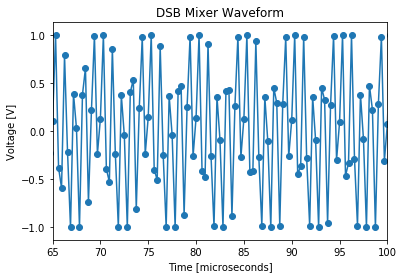

/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


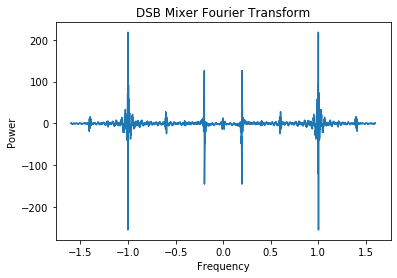

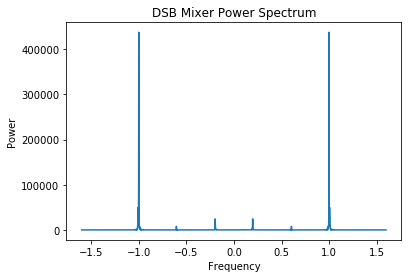

In [4]:
freq = 3200
fname = f'{pwd}dsb_3200_1.npy'
data = np.load(fname)[0]
time = np.arange(len(data)) * freq_to_period(freq) # in microseconds

plt.figure()
plt.plot(time, data)
plt.scatter(time, data)
plt.xlim(65, 100)
plt.title('DSB Mixer Waveform')
plt.xlabel('Time [microseconds]')
plt.ylabel('Voltage [V]')
plt.show()

f, Fx = ugradio.dft.dft(data, vsamp=freq/1000)

plt.figure()
plt.plot(f, Fx)
plt.title('DSB Mixer Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

plt.figure()
plt.plot(f, np.abs(Fx)**2)
plt.title('DSB Mixer Power Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

# 7.3.1: SSB without phase shift (same as DSB)
$\nu_{sample} = 3200$ kHz \
Anti-aliasing filter OFF \
6 dB attenuator \
Amplitude: 300 mVpp

Inputs:
$\nu_{LO} = 160$ MHz
$\nu_{RF} = 167.4$ MHz


Data fname:
ssb_no_phase_shift_combined3200.npy

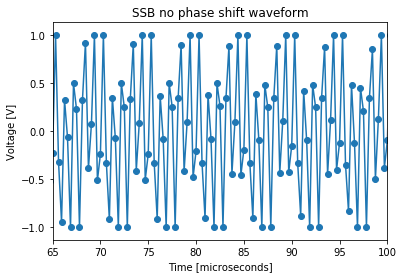

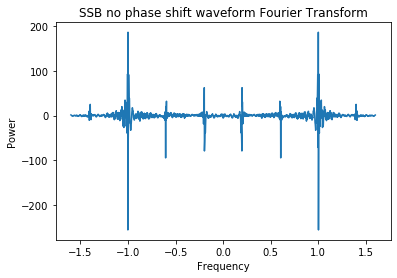

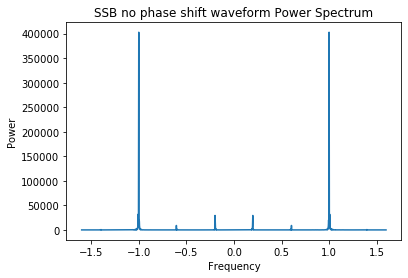

In [5]:
freq = 3200
fname = f'{pwd}ssb_no_phase_shift_combined3200.npy'
data = np.load(fname)[0]
time = np.arange(len(data)) * freq_to_period(freq) # in microseconds

plt.figure()
plt.plot(time, data)
plt.scatter(time, data)
plt.xlim(65, 100)
plt.title('SSB no phase shift waveform')
plt.xlabel('Time [microseconds]')
plt.ylabel('Voltage [V]')
plt.show()

f, Fx = ugradio.dft.dft(data, vsamp=freq/1000)

plt.figure()
plt.plot(f, Fx)
plt.title('SSB no phase shift waveform Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

plt.figure()
plt.plot(f, np.abs(Fx)**2)
plt.title('SSB no phase shift waveform Power Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

# 7.3.2: SSB with phase shift
$\nu_{sample} = 3200$ kHz \
Anti-aliasing filter OFF \
6 dB attenuator \
Amplitude: 300 mVpp \
We used a phase shifter (instead of a long cord) to generate 90 degree phase shift. We observe harmonics because there is some clipping - adding attenuator helped but we still observe clipping. We expect a frequency peak at 1 MHz because of aliasing.

Inputs:
$\nu_{LO} = 160$ MHz \
$\nu_{RF} = 167.4$ MHz


Data fname:
ssb_combined3200_2.npy (first one was without attenuator)

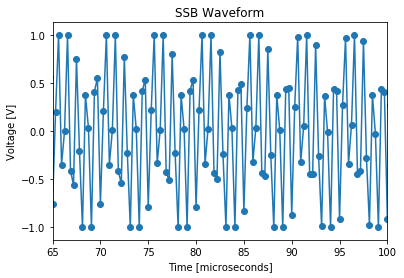

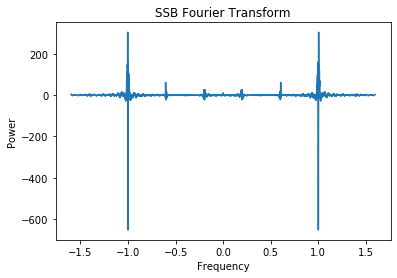

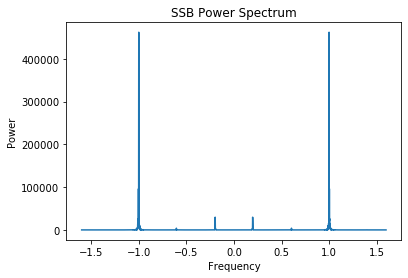

In [6]:
freq = 3200
fname = f'{pwd}ssb_combined3200_2.npy'
data = np.load(fname)[0]
time = np.arange(len(data)) * freq_to_period(freq) # in microseconds

plt.figure()
plt.plot(time, data)
plt.scatter(time, data)
plt.xlim(65, 100)
plt.title('SSB Waveform')
plt.xlabel('Time [microseconds]')
plt.ylabel('Voltage [V]')
plt.show()

f, Fx = ugradio.dft.dft(data, vsamp=freq/1000)

plt.figure()
plt.plot(f, Fx)
plt.title('SSB Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

plt.figure()
plt.plot(f, np.abs(Fx)**2)
plt.title('SSB Power Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

# 7.3.3: using SDR LO feature: CAN'T FIGURE OUT
$\nu_{sample} = 3200$ kHz \
Anti-aliasing filter OFF \
Amplitude: 300 mVpp

Inputs:
$\nu_{LO} = 160$ MHz - generated by SDR \
$\nu_{RF} = 167.4$ MHz

Also tried inputs:
$\nu_{LO} = 800$ kHz - generated by SDR \
$\nu_{RF} = 700$ kHz \

Regardless of what input frequencies we try, there is a frequency peak at either around 0.3 or -0.3 (never both). We tried increasing gain factor to 4, 20, 200 and turning the default anti-aliasing filter back on, but results stayed the same. 

### Data Naming Convention: 
ssb_digital_3200_1.npy \

In [7]:
freq = 3200
fname = f'{pwd}ssb_digital_3200_1.npy'
data = np.load(fname)[0]
time = np.arange(len(data)) * freq_to_period(freq) # in microseconds

/usr/lib/python3/dist-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


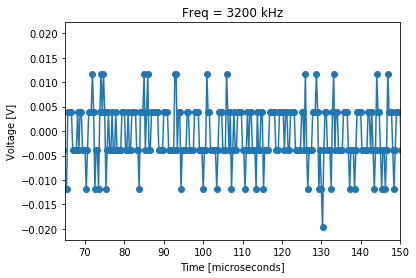

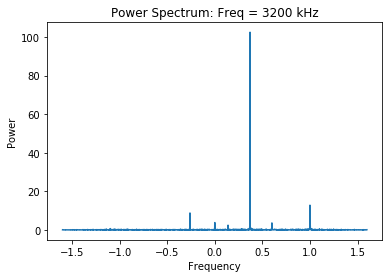

In [8]:
plt.figure()
plt.plot(time, data)
plt.scatter(time, data)
plt.xlim(65, 150)
plt.title('Freq = ' + str(freq) + ' kHz')
plt.xlabel('Time [microseconds]')
plt.ylabel('Voltage [V]')
plt.show()

f, Fx = ugradio.dft.dft(data, vsamp=freq/1000)

plt.figure()
plt.plot(f, np.abs(Fx)**2)
plt.title('Power Spectrum: Freq = ' + str(freq) + ' kHz')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()